# Бенчмарк для задачи OneTwoTrip Contest

https://boosters.pro/championship/onetwotrip_challenge/overview
    
    
для студентов ВМК МГУ

2019, Александр Дьяконов www.dyakonov.org/ag/

In [1]:
# подгружаем все нужные пакеты
import pandas as pd
import numpy as np
# для встроенных картинок
%pylab inline
# отключить предупреждения
import warnings
warnings.filterwarnings('ignore')
# прогресс-бар
from tqdm import tqdm, tqdm_notebook

Populating the interactive namespace from numpy and matplotlib


## загрузка данных

In [2]:
data_train = pd.read_csv('../data/onetwotrip_challenge_train.csv')
data_test = pd.read_csv('../data/onetwotrip_challenge_test.csv')
print ('размеры:', data_train.shape, data_test.shape)

размеры: (196056, 43) (455011, 37)


## посмотрим на данные

обратите внимание, как выводятся дата-фреймы

In [3]:
data_train.head()

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,...,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
0,0,10d654494cbe97bbb25d51ead2600679aff9e097924add...,0,-0.626508,11,12,1,1,0,1,...,1,0,1,1,0,1,0,0,0,0
1,1,4aafc0391f72bbcf60537aece62923baf9ce644b64ac36...,144,-0.393794,5,7,2,0,0,2,...,1,0,1,0,0,0,0,0,0,0
2,2,bac8ffef46348f587c8d17137ab01fb24aef21547c647d...,134,-0.548937,2,3,2,0,0,1,...,1,0,1,1,0,0,0,0,0,0
3,3,0392247b4b87674aba2c32bf2292b105771a6a376871be...,0,-0.238651,10,11,1,1,3,2,...,1,0,1,1,0,0,0,0,0,0
4,4,d1aeefef311bbeb4bd84876c8d49421f276674527d5578...,0,-0.704079,8,11,1,1,0,1,...,1,0,0,1,0,0,0,0,0,0


In [4]:
data_test.head()

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,...,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25
0,0,3a6a6af55e097d3f92705936a7ea3ca8aef651f5966832...,0,-0.548937,10,10,1,1,0,1,...,1,1,1,0,4,1,1,0,0,1
1,1,2df10f61960163da94a4294773ed9c865296e37c330304...,82,-0.626508,3,4,3,0,0,1,...,1,1,1,0,1,1,1,0,1,1
2,2,20dc3fec5b5eb42fbfe08119063c3a0010a73c7ec94abb...,0,-0.548937,6,8,1,1,0,2,...,35,1,1,0,2,1,0,0,1,1
3,3,ed75b3496977bac207eccb59dc91fe9a8d6a27777a6422...,6,0.304348,7,7,2,0,10,1,...,1,3,1,0,3,1,1,0,1,1
4,4,a346d08351c5fd0bda82984ed7c8b12b6395829da5b857...,115,-0.471365,3,3,2,0,0,1,...,1,1,1,0,1,1,1,0,1,1


## получаем таблички для обучения

In [5]:
# удаляем ненужные признаки
ids = data_test.pop('orderid') # сохраняем id для теста
data_test.drop(['userid'], inplace=True, axis=1)

In [6]:
cols = data_test.columns # значимые колонки
cols

Index(['field0', 'field1', 'field2', 'field3', 'field4', 'field5', 'field6',
       'field7', 'field8', 'field9', 'field10', 'field11', 'field12',
       'field13', 'field14', 'field15', 'field16', 'field17', 'field18',
       'field19', 'field20', 'field21', 'field22', 'field23', 'field24',
       'field25', 'field26', 'field27', 'field28', 'field29',
       'indicator_goal21', 'indicator_goal22', 'indicator_goal23',
       'indicator_goal24', 'indicator_goal25'],
      dtype='object')

In [7]:
y = data_train.pop('goal1') # целевая переменная для первой задачи

In [8]:
y = y.values # мне так спокойней - в numpy.array

In [9]:
data_train = data_train[cols] # оставить только нужные колонки

In [10]:
# что получилось
data_train.head()

,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,...,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25
0,0,-0.626508,11,12,1,1,0,1,1,0,...,1,2,1,0,4,1,1,0,1,1
1,144,-0.393794,5,7,2,0,0,2,1,0,...,41,3,1,0,2,1,1,0,1,0
2,134,-0.548937,2,3,2,0,0,1,1,0,...,1,11,7,0,1,1,1,0,1,1
3,0,-0.238651,10,11,1,1,3,2,1,0,...,18,1,1,0,4,1,1,0,1,1
4,0,-0.704079,8,11,1,1,0,1,1,0,...,1,1,1,0,3,1,1,0,0,1


### Эксперименты

сначала делим выборку на обучение и тест

не самое лучшее решение, но для быстроты экспериментов сгодится

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, y, test_size=0.3, random_state=13)

### Случайный лес


строим по одному дереву и вычисляем метрику качества (ROC AUC)

обратите внимание на прогресс-бар

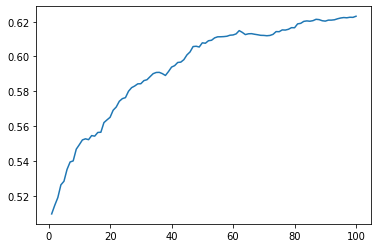

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

model = RandomForestClassifier(max_features=1, n_estimators=1, oob_score=False, warm_start=True, random_state=1)

aucs = []
for t in tqdm_notebook(list(range(1, 101))):
    model.set_params(n_estimators=t)
    model.fit(X_train, y_train)
    a = model.predict_proba(X_test)[:, 1]
    q = roc_auc_score(y_test, a)
    aucs.append(q)
    
plt.plot(range(1, 101), aucs)

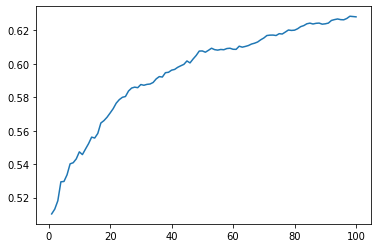

In [13]:
# аналогичные эксперименты с max_features=2

model = RandomForestClassifier(max_features=2, n_estimators=1, oob_score=False, warm_start=True, random_state=1)

aucs = []
for t in tqdm_notebook(list(range(1, 101))):
    model.set_params(n_estimators=t)
    model.fit(X_train, y_train)
    a = model.predict_proba(X_test)[:, 1]
    q = roc_auc_score(y_test, a)
    aucs.append(q)
    
plt.plot(range(1, 101), aucs)   

# Козырь

более хорошая модель из другой библиотеки

In [14]:
import lightgbm as lgb
model = lgb.LGBMClassifier(num_leaves=6, learning_rate=0.08, n_estimators=700)

In [15]:
%%time

param = {'num_leaves': 6, 'objective': 'binary', 'learning_rate': 0.1}
param['metric'] = 'auc'

q = lgb.train(param, train_set=lgb.Dataset(X_train, y_train), num_boost_round=500,
              valid_sets=[lgb.Dataset(X_train, y_train), lgb.Dataset(X_test, y_test)],
             verbose_eval=50)

[50]	valid_0's auc: 0.706054	valid_1's auc: 0.677412
[100]	valid_0's auc: 0.722662	valid_1's auc: 0.680443
[150]	valid_0's auc: 0.734048	valid_1's auc: 0.679557
[200]	valid_0's auc: 0.745404	valid_1's auc: 0.679468
[250]	valid_0's auc: 0.754917	valid_1's auc: 0.678977
[300]	valid_0's auc: 0.761519	valid_1's auc: 0.678591
[350]	valid_0's auc: 0.769911	valid_1's auc: 0.677659
[400]	valid_0's auc: 0.775379	valid_1's auc: 0.675867
[450]	valid_0's auc: 0.780452	valid_1's auc: 0.674587
[500]	valid_0's auc: 0.786622	valid_1's auc: 0.673604
CPU times: user 3min 11s, sys: 4.36 s, total: 3min 15s
Wall time: 6.35 s


<bound method Booster.eval_valid of <lightgbm.basic.Booster object at 0x7efbc47e1450>>

Воспользуемся bayes_opt для подбора параметров:

In [133]:
from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_auc_score


def lgb_bayesian(max_depth,
                 lambda_l1,
                 lambda_l2,
                 bagging_fraction,
                 bagging_freq,
                 colsample_bytree,
                 learning_rate,
                 num_leaves,
                 max_bin
                      ):
    params = {
        'boosting_type': 'gbdt',
        'metric': 'AUC',
        'objective': 'binary',
        'eval_metric': 'AUC',
        'n_jobs': 16,
        'seed': 42,
        'early_stopping_rounds': 150,
        'n_estimators': 2000,
        'learning_rate': learning_rate,
        'max_depth': int(max_depth),
        'lambda_l1': lambda_l1,
        'lambda_l2': lambda_l2,
        'bagging_fraction': bagging_fraction,
        'bagging_freq': int(bagging_freq),
        'colsample_bytree': colsample_bytree,
        'verbose': 0
    }
    model = lgb.LGBMClassifier(boosting_type=params['boosting_type'],
                                metric='AUC',
                                objective='binary',
                                eval_metric='AUC',
                                n_jobs= 16,
                                seed=42,
#                                 early_stopping_rounds=150,
                                n_estimators= 2000,
                                learning_rate=learning_rate,
                                max_depth=int(max_depth),
                                lambda_l1=lambda_l1,
                                lambda_l2=lambda_l2,
                                bagging_fraction=bagging_fraction,
                                bagging_freq=int(bagging_freq),
                                max_bin=int(max_bin),
                                num_leaves=int(num_leaves),
                                colsample_bytree=colsample_bytree,
                                verbose=0,
#                                 valid_sets=[lgb.Dataset(X_train, y_train), lgb.Dataset(X_test, y_test)]
                                )
    model.fit(X_train, y_train)

    return roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

In [134]:
bounds_LGB = {
    'max_depth': (2, 20),
    'lambda_l1': (0, 10),
    'lambda_l2': (0, 10),
    'bagging_fraction': (0.4, 0.9),
    'bagging_freq': (1, 10),
    'colsample_bytree': (0.4, 0.9),
    'learning_rate': (0.025, 0.1),
    'num_leaves': (2, 20),
    'max_bin': (2, 1000)
}


lgbm_BO = BayesianOptimization(lgb_bayesian, bounds_LGB, random_state=13 * 2)

In [135]:
%%time

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    lgbm_BO.maximize(init_points=50, n_iter=50)

|   iter    |  target   | baggin... | baggin... | colsam... | lambda_l1 | lambda_l2 | learni... | max_depth |
-------------------------------------------------------------------------------------------------------------
|  1        |  0.6482   |  0.4616   |  5.675    |  0.5537   |  3.946    |  4.353    |  0.03909  |  6.851    |
|  2        |  0.6332   |  0.4992   |  7.652    |  0.439    |  0.8987   |  2.694    |  0.04621  |  15.7     |
|  3        |  0.6336   |  0.4539   |  3.642    |  0.5925   |  4.566    |  2.841    |  0.06141  |  13.77    |
|  4        |  0.6279   |  0.5073   |  9.962    |  0.4284   |  4.877    |  3.098    |  0.07904  |  7.311    |
|  5        |  0.6321   |  0.52     |  7.756    |  0.5283   |  4.616    |  4.444    |  0.07335  |  7.322    |
|  6        |  0.632    |  0.5365   |  3.493    |  0.4253   |  2.85     |  2.045    |  0.06703  |  17.38    |
|  7        |  0.6565   |  0.4193   |  4.189    |  0.5947   |  4.61     |  4.843    |  0.02882  |  17.9     |
|  8      

|  45       |  0.6469   |  0.5619   |  7.966    |  0.5621   |  2.462    |  2.873    |  0.03521  |  14.28    |
|  46       |  0.6588   |  0.4114   |  7.416    |  0.5107   |  2.261    |  0.6077   |  0.06637  |  3.441    |
|  47       |  0.6265   |  0.5386   |  6.678    |  0.541    |  4.58     |  3.112    |  0.08385  |  10.24    |
|  48       |  0.6158   |  0.4334   |  5.855    |  0.5232   |  3.644    |  2.384    |  0.09662  |  12.15    |
|  49       |  0.6199   |  0.5028   |  8.239    |  0.4871   |  4.094    |  3.827    |  0.09063  |  12.32    |
|  50       |  0.6596   |  0.4816   |  7.44     |  0.4211   |  1.507    |  0.8499   |  0.06956  |  3.69     |
|  51       |  0.676    |  0.6      |  1.534    |  0.5957   |  0.0      |  9.839e-1 |  0.025    |  2.0      |
|  52       |  0.6466   |  0.5965   |  9.079    |  0.5181   |  4.967    |  4.909    |  0.04237  |  19.56    |
|  53       |  0.6782   |  0.5177   |  1.0      |  0.4      |  0.02699  |  5.0      |  0.025    |  2.0      |
|  54     

|  90       |  0.6604   |  0.5885   |  1.228    |  0.5149   |  4.801    |  4.823    |  0.03107  |  5.213    |
|  91       |  0.6767   |  0.5709   |  9.812    |  0.4042   |  0.3801   |  3.825    |  0.02509  |  2.307    |
|  92       |  0.6779   |  0.5073   |  1.032    |  0.4442   |  3.905    |  2.383    |  0.02632  |  2.595    |
|  93       |  0.6758   |  0.5845   |  1.877    |  0.4037   |  2.829    |  0.5012   |  0.02574  |  3.135    |
|  94       |  0.678    |  0.5761   |  4.474    |  0.423    |  0.3675   |  1.864    |  0.02594  |  2.632    |
|  95       |  0.6767   |  0.5657   |  9.397    |  0.4248   |  2.971    |  0.1769   |  0.0296   |  2.002    |
|  96       |  0.6771   |  0.4      |  4.06     |  0.4      |  5.0      |  5.0      |  0.025    |  2.0      |
|  97       |  0.6786   |  0.5773   |  5.896    |  0.5434   |  2.155    |  0.004428 |  0.02783  |  2.226    |
|  98       |  0.6762   |  0.5994   |  5.694    |  0.5049   |  0.334    |  4.893    |  0.02527  |  3.297    |
|  99     

In [138]:
# model_params = {
#     'max_depth': int(lgbm_BO.max['params']['max_depth']),
# #     'n_estimators': int(lgbm_BO.max['params']['n_estimators']),
#     'learning_rate': lgbm_BO.max['params']['learning_rate'],
#     'num_leaves': int(lgbm_BO.max['params']['num_leaves']),
#     'max_bin': int(lgbm_BO.max['params']['max_bin']),
#     'boosting_type': 'gbdt',
#     'metric': 'AUC',
#     'objective': 'binary',
#     'eval_metric': 'AUC',
#     'n_jobs': 16,
#     'seed': 42,
# #     'early_stopping_rounds': 150,
#     'n_estimators': 2000,
#     'lambda_l1': lambda_l1,
#     'lambda_l2': lambda_l2,
#     'bagging_fraction': lgbm_BO.max['params']['bagging_fraction'],
#     'bagging_freq': int(lgbm_BO.max['params']['bagging_freq']),
#     'colsample_bytree': lgbm_BO.max['params']['colsampel_bytree'],
#     'verbose': 0
}

KeyError: 'num_leaves'

In [142]:
model = lgb.LGBMClassifier(
            max_depth=int(lgbm_BO.max['params']['max_depth']),
            learning_rate=lgbm_BO.max['params']['learning_rate'],
#             num_leaves=int(lgbm_BO.max['params']['num_leaves']),
#             max_bin=int(lgbm_BO.max['params']['max_bin'])
            boosting_type='gbdt',
            metric='AUC',
            objective='binary',
            eval_metric='AUC',
            n_jobs=16,
            seed=42,
        #     'early_stopping_rounds': 150,
            n_estimators=2000,
            lambda_l1=lgbm_BO.max['params']['lambda_l1'],
            lambda_l2=lgbm_BO.max['params']['lambda_l2'],
            bagging_fraction=lgbm_BO.max['params']['bagging_fraction'],
            bagging_freq=int(lgbm_BO.max['params']['bagging_freq']),
            colsample_bytree=lgbm_BO.max['params']['colsample_bytree'],
            verbose=0
        )

In [143]:
model.fit(data_train, y)

LGBMClassifier(bagging_fraction=0.5559426261034605, bagging_freq=6,
               boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.5568621880910727, eval_metric='AUC',
               importance_type='split', lambda_l1=4.828710065743733,
               lambda_l2=0.16813458388620361,
               learning_rate=0.025236401957410032, max_depth=2, metric='AUC',
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=2000, n_jobs=16, num_leaves=31, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, seed=42,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0, verbose=0)

In [144]:
a = model.predict_proba(data_test)[:, 1] # вероятности за 1й класс

In [145]:
pd.DataFrame(a,  columns=['proba'], index=ids.values).to_csv('dj1_01_.csv')

In [146]:
from catboost import CatBoostClassifier


def catboost_bayesian(max_depth,
                      n_estimators,
                      lr,
                      ):
    max_depth = int(max_depth)
    n_estimators = int(n_estimators)
    model = CatBoostClassifier(max_depth=max_depth, n_estimators=n_estimators,
                               learning_rate=lr, objective='CrossEntropy', eval_metric='AUC',
                               task_type='GPU', verbose=0, thread_count=16)
    model.fit(X_train, y_train)

    return roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

In [147]:
bounds_cat = {
    'max_depth': (1, 16),
    'n_estimators': (1, 1000),
    'lr': (1e-3, 1),
}

cat_BO = BayesianOptimization(catboost_bayesian, bounds_cat, random_state=13 * 2)

In [148]:
%%time
import warnings


with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    cat_BO.maximize(init_points=10, n_iter=10, acq='ucb')

|   iter    |  target   |    lr     | max_depth | n_esti... |
-------------------------------------------------------------
|  1        |  0.5608   |  0.3086   |  8.791    |  768.5    |
|  2        |  0.5876   |  0.7894   |  14.06    |  188.7    |
|  3        |  0.577    |  0.2702   |  8.443    |  739.4    |
|  4        |  0.6718   |  0.1958   |  3.696    |  539.3    |
|  5        |  0.5972   |  0.2835   |  12.41    |  270.4    |
|  6        |  0.6126   |  0.2942   |  15.44    |  913.3    |
|  7        |  0.5539   |  0.5686   |  8.282    |  654.1    |
|  8        |  0.5975   |  0.5371   |  15.94    |  142.8    |
|  9        |  0.5839   |  0.9754   |  10.29    |  720.8    |
|  10       |  0.5915   |  0.2958   |  10.0     |  750.9    |
|  11       |  0.524    |  1.0      |  1.0      |  1.0      |


KeyboardInterrupt: 

In [149]:
model = CatBoostClassifier(max_depth=int(cat_BO.max['params']['max_depth']),
                           n_estimators=int(cat_BO.max['params']['n_estimators']),
                           learning_rate=cat_BO.max['params']['lr'],
                           objective='CrossEntropy', eval_metric='AUC',
                               task_type='GPU', verbose=0, thread_count=16)

In [150]:
model.fit(data_train, y)

In [151]:
a = model.predict_proba(data_test)[:, 1] # вероятности за 1й класс

In [152]:
pd.DataFrame(a,  columns=['proba'], index=ids.values).to_csv('dj1_01_.csv')

### Обучение и формирование ответа

In [16]:
model.fit(data_train, y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.08, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=700, n_jobs=-1, num_leaves=6, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [17]:
a = model.predict_proba(data_test)[:, 1] # вероятности за 1й класс

In [18]:
pd.DataFrame(a,  columns=['proba'], index=ids.values).to_csv('dj1_01_.csv')